In [68]:
from random import choices
import networkx as nx
import matplotlib.pyplot as plt
from pprint import pprint

In [71]:
def nussinov(seq, min_loop_len=1):
    """
    Nussinov RNA folding algorithm
    """
    
    n = len(seq)
    
    # score matrix initialization
    score = [[-1] * n for _ in range(n)]
    for k in range(min_loop_len):
        for i in range(n-k):
            score[i][i+k] = 0
    
    # fill score matrix
    def score_filler(i, j):
        if i >= j - min_loop_len:
            return 0
        elif score[i][j] > -1:
            return score[i][j]
        else:
            select = [score_filler(i, j-1), score_filler(i+1, j)]
            select.extend([score_filler(i, k) + score_filler(k+1, j) for k in range(i+1, j)])
            if (seq[i], seq[j]) in [('A', 'U'), ('U', 'A'), ('C', 'G'), ('G', 'C')]:
                select.append(score_filler(i+1, j-1) + 1)
            score[i][j] = max(select)
            
            return score[i][j]
            
    for i in range(n):
        for j in range(i+min_loop_len, n):
            score[i][j] = score_filler(i, j)

    pairs = []
    for i in range(n):
        for j in range(i):
            score[i][j] = score[j][i]
        
    def traceback(i, j):
        if j <= i:
            return
        elif score[i][j] == score[i][j-1]:
            traceback(i, j-1)
        elif score[i][j] == score[i+1][j]:
            traceback(i+1, j)
        else:
            for k in range(i, j-min_loop_len):
                if (seq[k], seq[j]) in [('A', 'U'), ('U', 'A'), ('C', 'G'), ('G', 'C')]:
                    if k-1<0:
                        if score[i][j] == score[k+1][j-1] + 1:
                            pairs.append((k,j))
                            traceback(k+1, j-1)
                            break
                    elif score[i][j] == score[i][k-1] + score[k+1][j-1] + 1:
                        pairs.append((k,j))
                        traceback(i, k-1)
                        traceback(k+1, j-1)
                        break
    traceback(0, n-1)
    
    return score[0][n-1], pairs


In [3]:
test1 = 'AAAUCCCAGGA'
test2 = 'GGUCCAC'
test3 = 'GCACGACG'
test4 = 'GGACC'

In [93]:
testrnd = ''.join(choices('AUGC', k=50))

In [94]:
test = testrnd
n = len(test)

In [100]:
pairnum, pairs = nussinov(test, min_loop_len=3)

In [101]:
pairnum

16

In [102]:
# Parentesis
structure_list = ['.'] * n
for pair in pairs:
    structure_list[min(pair)] = '('
    structure_list[max(pair)] = ')'
structure = ''.join(structure_list)
print(structure)

(((...(.((.(.((((((...).).)..)))))))))).(((....)))


In [103]:
G = nx.Graph()
for i in range(n):
    G.add_node(i, label=test[i])
    if i > 0:
        G.add_edge(i-1, i, color='b', weight=5)
for a, b in pairs:
    G.add_edge(a, b, color='g', weight=2)

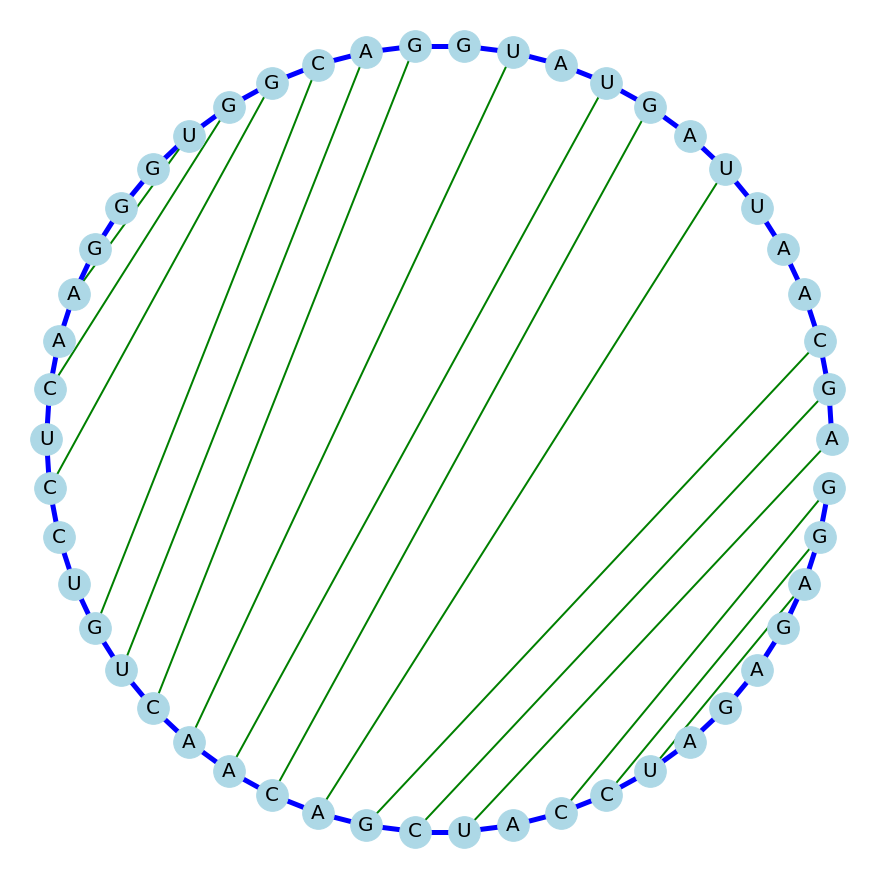

In [104]:
plt.figure(figsize=(12,12)) 
nx.draw_circular(G, with_labels=True, node_size=1000, font_size=20, node_color='lightblue', 
                 labels=nx.get_node_attributes(G, 'label'),
                 edge_color=nx.get_edge_attributes(G, 'color').values(), 
                 width=list(nx.get_edge_attributes(G,'weight').values()))